In [0]:
import csv
import numpy as np

In [0]:
arr = []
with open('faces.csv', 'r') as f:
    spamreader = csv.reader(f, delimiter=' ')
    for row in f:
        arr.append([float(x) for x in row.split(',')])
arr = np.array(arr)

In [0]:
def pca(data):

    sigma = np.matmul(data.T, data) / data.shape[0]
    eigval, eigvec = np.linalg.eigh(sigma)
    # sort eigen-vectors/values in decenting order
    idx = np.argsort(eigval)[::-1]
    eigvec = eigvec[:,idx]
    eigval = eigval[idx]
    # select top n dim
    # topn_eigvec = eigvec[:,:dim]
    # topn_eigval = eigval[:dim]
    return eigvec, eigval

In [0]:
eigvec, eigval = pca(arr)

In [6]:
key_idx = [1, 2, 10, 30, 50]
for idx in key_idx:
    print('Eigenvalues ({}={}): {}'.format('lambda', idx, eigval[idx-1]))

Eigenvalues (lambda=1): 781.8126992600016
Eigenvalues (lambda=2): 161.15157496732652
Eigenvalues (lambda=10): 3.339586754887826
Eigenvalues (lambda=30): 0.80908779037772
Eigenvalues (lambda=50): 0.3895777395181449


In [0]:
fractional_err = []
eigval_sum = sum(eigval)
topn_sum = 0
for idx, val in enumerate(eigval):
    topn_sum += val
    fractional_err.append(1-(topn_sum/eigval_sum))

Text(0.5, 1.0, 'Fractional Construction Error')

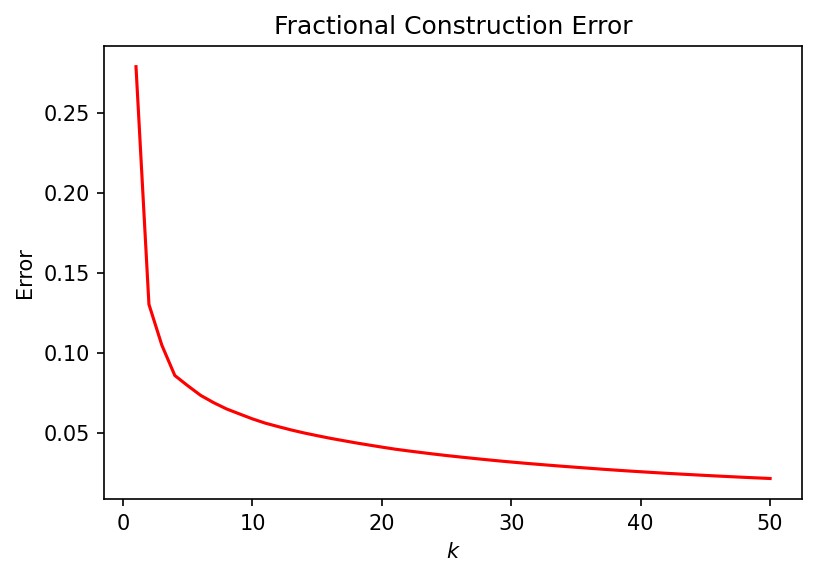

In [8]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.dpi']= 150


plt.figure()
plt.plot(list(range(1,51)), np.array(fractional_err[:50]), c='red')
plt.xlabel(r'$k$')
plt.ylabel('Error')
plt.title('Fractional Construction Error')

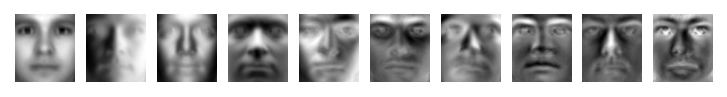

In [10]:
plt.subplots()
for idx in range(10):
    plt.subplot(1,10,idx+1)
    plt.imshow(np.reshape((eigvec.T)[idx], (84, 96)).T, cmap='gray')
    plt.axis('off')

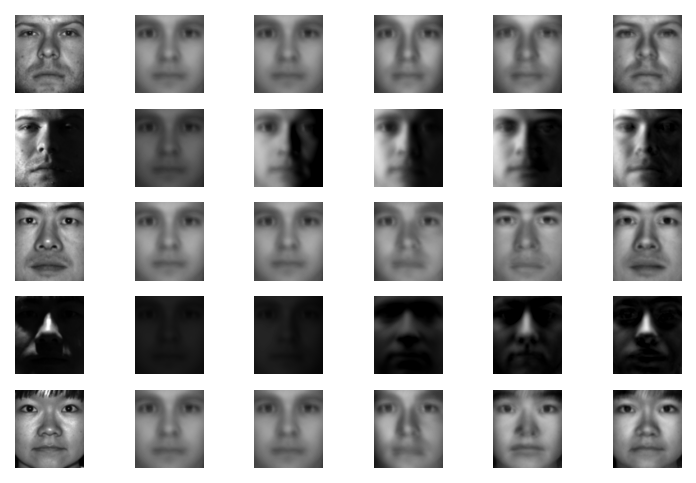

In [11]:
img_ids = [0, 23, 64, 67, 256]
# img_ids = [0]
ks = [1, 2, 5, 10, 50]

plt.subplots()
for i, img_id in enumerate(img_ids):
    
    plt.subplot(5,6,i*6+1)
    plt.imshow(np.reshape(arr[img_id], (84,96)).T, vmin=0, vmax=1, cmap='gray')
    plt.axis('off')

    for j, k in enumerate(ks):

        reconstruct = np.matmul(arr[img_id], np.matmul(eigvec[:,:k],eigvec[:,:k].T))

        plt.subplot(5,6,i*6+j+2)
        plt.imshow(np.reshape(reconstruct, (84,96)).T, vmin=0, vmax=1, cmap='gray')
        plt.axis('off')